In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

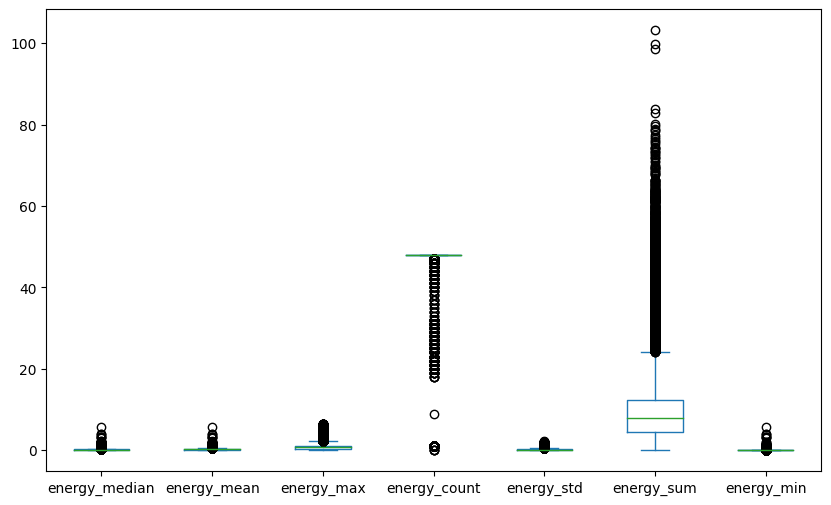

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,0.1910,0.325979,0.788,48,0.259205,15.647,0.066


In [ ]:
data = pd.read_csv('daily_dataset.csv')
columns = ['LCLid','day','energy_median', 'energy_mean', 'energy_max', 'energy_count', 'energy_std', 'energy_sum', 'energy_min']

numeric_columns = ['LCLid','day','energy_median', 'energy_mean', 'energy_max', 'energy_count', 'energy_std', 'energy_sum', 'energy_min']
data = data[columns].apply(pd.to_numeric, errors='coerce')


data.drop('LCLid',axis=1,inplace=True)
data.drop('day',axis=1,inplace=True)

data.plot(kind='box' ,figsize=(10, 6))
plt.show()
data.head()

In [ ]:

data.dropna(subset=['energy_mean'], inplace=True)
data.fillna(data.mean(), inplace=True)

X = data.drop('energy_mean', axis=1)
y = data['energy_mean']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


model = LinearRegression()


model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy *100)

99.41734581149845


In [ ]:

pca = PCA(n_components=5)
X_pca = pca.fit_transform(data)


pca_1_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3','PC4','PC5',])

columns=['PC1', 'PC2','PC3','PC4','PC5']
pca_1_df = pca_1_df[columns].apply(pd.to_numeric, errors='coerce')
pca_1_df['PC1'] = pca_1_df['PC1'].abs()
pca_1_df['PC2'] = pca_1_df['PC2'].abs()
pca_1_df['PC3'] = pca_1_df['PC3'].abs()
pca_1_df['PC4'] = pca_1_df['PC4'].abs()
pca_1_df['PC5'] = pca_1_df['PC5'].abs()

pca_1_df.to_csv('dataset_with_pca_1.csv', index=False)

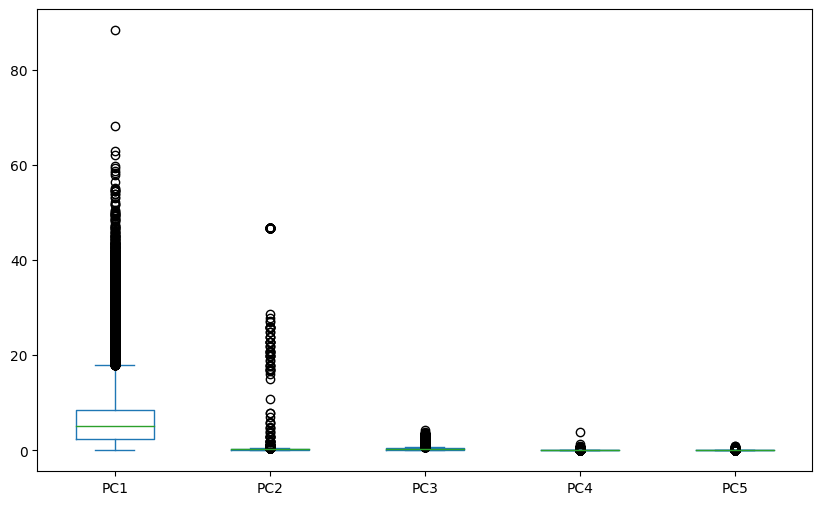

,PC1,PC2,PC3,PC4,PC5
0,2.323702,25.834932,0.032768,0.039259,0.219491
1,2.743056,0.100360,0.015007,0.094208,0.023005
2,2.380060,0.171077,0.102430,0.045961,0.033907
3,0.983149,0.152087,0.196897,0.070476,0.040052
4,4.151139,0.081751,0.404259,0.120541,0.031997


In [ ]:
pca_1_df.plot(kind='box' ,figsize=(10, 6))
plt.show()
pca_1_df.head()

In [ ]:
X = pca_1_df.drop('PC1', axis=1)
y = pca_1_df['PC1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy * 100)

33.99913921233762


In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(pca_1_df)
pca_2_df = pd.DataFrame(principalComponents, columns=['PC1', 'PC2', 'PC3'])

pca_2_df.to_csv('dataset_with_pca_2.csv', index=False)
columns=['PC1', 'PC2', 'PC3']
pca_2_df = pca_2_df[columns].apply(pd.to_numeric, errors='coerce')
pca_2_df['PC1'] = pca_2_df['PC1'].abs()
pca_2_df['PC2'] = pca_2_df['PC2'].abs()
pca_2_df['PC3'] = pca_2_df['PC3'].abs()

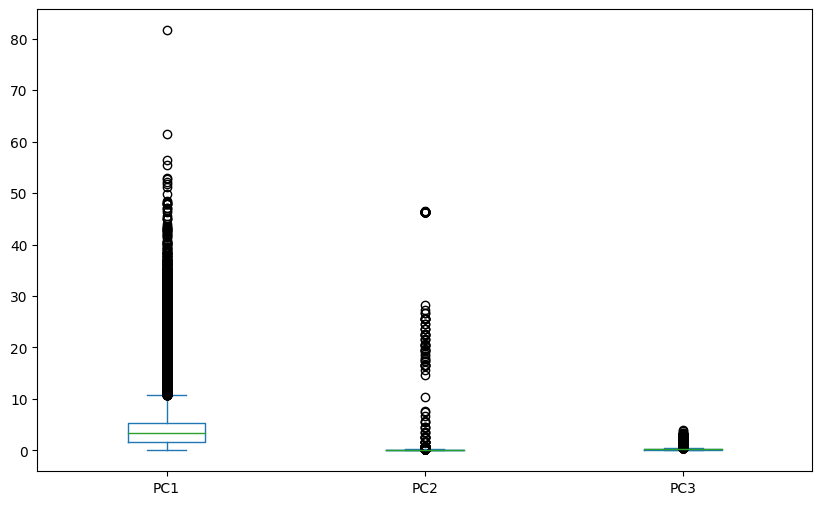

,PC1,PC2,PC3
0,3.845949,25.602979,0.153262
1,3.895139,0.134197,0.275324
2,4.255842,0.057517,0.186553
3,5.651470,0.051458,0.072924
4,2.482860,0.179948,0.097051


In [ ]:
pca_2_df.plot(kind='box' ,figsize=(10, 6))
plt.show()
pca_2_df.head()

In [ ]:
X = pca_2_df.drop('PC1', axis=1)
y = pca_2_df['PC1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy * 100)

5.473383225002271


**Reconstruction Error:-**

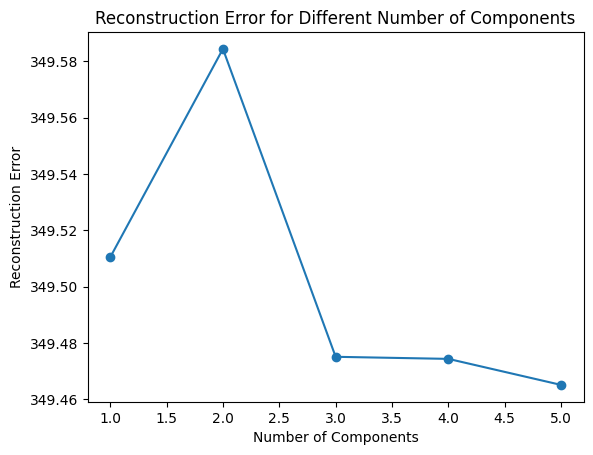

Best Number of Components: 5
Lowest Reconstruction Error: 349.46511194035435


In [ ]:
data = pd.read_csv('daily_dataset.csv')

columns = ['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max', 'energy_count', 'energy_std', 'energy_sum', 'energy_min']

data = data[columns].apply(pd.to_numeric, errors='coerce')

X = data.drop(['LCLid', 'day'], axis=1)

X.dropna(inplace=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

reconstruction_errors = []
n_components_values = range(1, 6)  # Range of n_components from 1 to 5

for n_components in n_components_values:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(data_scaled)
    reconstructed_data = pca.inverse_transform(X_pca)
    reconstruction_error = np.mean(np.square(X.values - reconstructed_data))
    reconstruction_errors.append(reconstruction_error)

# Find the best number of components based on the lowest reconstruction error
best_n_components = n_components_values[np.argmin(reconstruction_errors)]
lowest_reconstruction_error = min(reconstruction_errors)

# Plot the reconstruction errors with number of components
plt.plot(n_components_values, reconstruction_errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error for Different Number of Components')
plt.show()

print("Best Number of Components:", best_n_components)
print("Lowest Reconstruction Error:", lowest_reconstruction_error)
